实验 1：  线性回归  
一、实验目的： 
1、掌握 pytorch 中张量的基本操作。 
2、掌握利用 pytorch 对数据进行线性拟合。 
3、观察拟合后得到的模型并观察预测误差。  
 
二、实验内容： 
1、已知模型 y=ax+b，输入浮点数 a,b 并生成加噪后的数据，再利用梯度下
降算法迭代得到 a,b。利用的到模型对数据拟合并进行预测，记录误差，并绘制
出拟合效果。 
 
2、已知模型 y=ax3+bx2+cx+d，输入浮点数 a,b,c,d 生成加噪后的数据，再利用
梯度下降算法迭代得到相关参数。利用的到模型对数据拟合并进行预测，记录误
差，并绘制出拟合效果。  
        
3、设计神经网络对 1 和 2 的数据进行拟合，利用训练后的模型对数据拟合
并进行预测，记录误差，并绘制出拟合效果。  
                  
三、实验准备 
1、下载和安装 Anaconda, Pytorch 和 cuda 库 
      
2、下载和安装 Jupyter Notebook 或 Pycharm 或 Vs code 
 
 
四、实验指导 
   参考课堂资料和课件

creater：SA21225034 李辉坤

In [3]:
import torch
import numpy as np 
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F


D:\Mis\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ..\aten\src\ATen\native\RangeFactories.cpp:23.)
  after removing the cwd from sys.path.


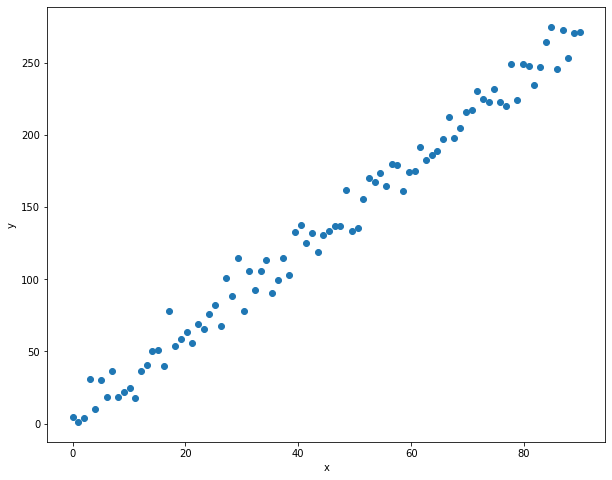

In [4]:
a = int (3)
b = int (2)
c = int (2)
x = torch.linspace(0,100,dtype=torch.float32)
rand = torch.randn(100)*10
b = b*torch.ones_like(x)
y = a*x+b+rand
z = a*x*x+b*x+c+rand
train_x = x[0:90]
test_x = x[90:100]
train_y = y[0:90]
test_y = y[90:100]


plt.figure(figsize=(10,8))
plt.plot(train_x.data.numpy(),train_y.data.numpy(),'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [5]:
def show_chart(train_x,train_y):
    plt.figure(figsize=(10,8))
    plt.plot(train_x.data.numpy(),train_y.data.numpy(),'o')
    plt.plot(train_x.data.numpy(),a.data.numpy()*train_x.data.numpy()+b.data.numpy())
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

loss tensor(12022.5996)
loss tensor(98.6262)
loss tensor(98.6011)
loss tensor(98.5773)
loss tensor(98.5546)
loss tensor(98.5331)
loss tensor(98.5126)
loss tensor(98.4932)
loss tensor(98.4747)
loss tensor(98.4572)
loss tensor(98.4405)
loss tensor(98.4246)
loss tensor(98.4095)
loss tensor(98.3952)
loss tensor(98.3816)
loss tensor(98.3686)
loss tensor(98.3563)
loss tensor(98.3446)
loss tensor(98.3335)
loss tensor(98.3229)


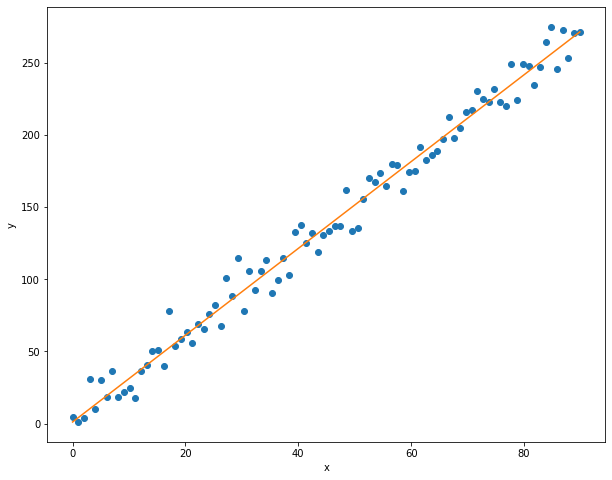

In [6]:
#训练
a = torch.rand(1,requires_grad=True)
b = torch.rand(1,requires_grad=True)
rate = 0.0001

for i in range(10000):
    pred = a.expand_as(train_x)*train_x+b.expand_as(train_y)
    loss = torch.mean((pred-train_y)**2)
    if i%500 == 0:
        print('loss',loss.data)
    loss.backward()
    a.data = a.data - a.grad.data*rate
    b.data = b.data - b.grad.data*rate
    a.grad.data.zero_()
    b.grad.data.zero_()
show_chart(train_x,train_y)

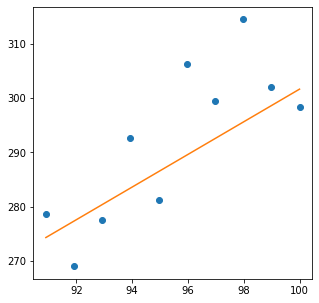

In [7]:
def Predict(test_x,test_y):
    pred = a.expand_as(test_x)*test_x+b.expand_as(test_y)
    plt.figure(figsize=(5,5))
    plt.plot(test_x.data.numpy(),test_y.data.numpy(),'o')
    plt.plot(test_x.data.numpy(),pred.data.numpy())
    plt.show()
Predict(test_x,test_y)
    

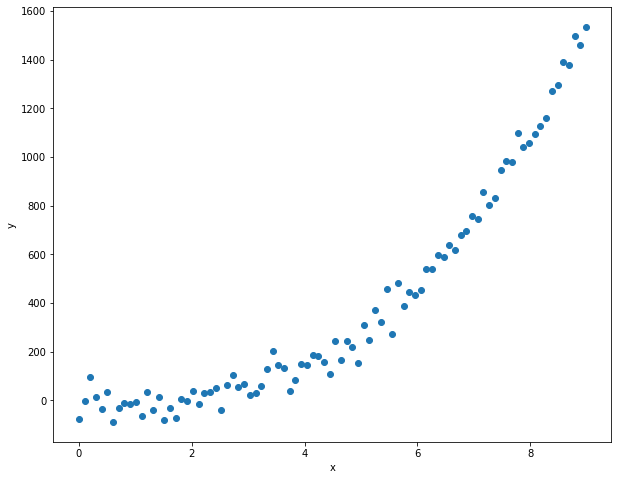

In [8]:
a = float (2)
b = float (1)
c = float (1)
d = float (5)
x = torch.linspace(0,10,dtype=torch.float32)
rand = torch.randn(100)*50
b = b*torch.ones_like(x)
y = a*x*x*x+b*x*x+c*x+d+rand
train_x = x[0:90]
test_x = x[90:100]
train_y = y[0:90]
test_y = y[90:100]
plt.figure(figsize=(10,8))
plt.plot(train_x.data.numpy(),train_y.data.numpy(),'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

tensor([0.1126], requires_grad=True) tensor([0.9965], requires_grad=True) tensor([0.7656], requires_grad=True) tensor([0.8285], requires_grad=True)


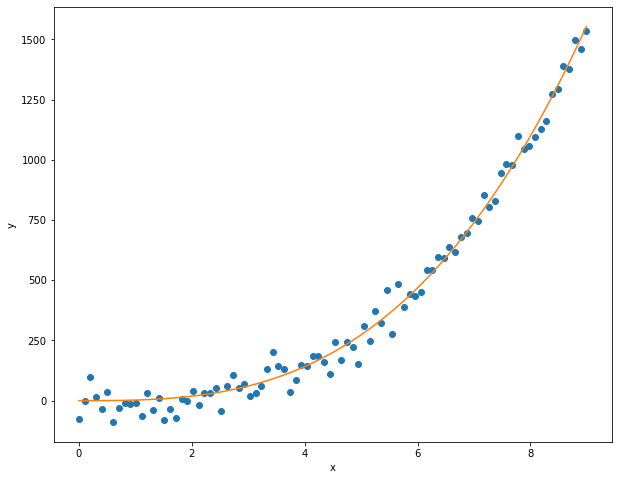

In [9]:
rate = 0.00001
def Train():
    a = torch.rand(1,requires_grad=True)
    b = torch.rand(1,requires_grad=True)
    c = torch.rand(1,requires_grad=True)
    d = torch.rand(1,requires_grad=True)
    print(a,b,c,d)
    for i in range(10000):
        pred = a.expand_as(train_x)*train_x*train_x*train_x+b.expand_as(train_x)*train_x*train_x+c.expand_as(train_x)*train_x+d.expand_as(train_y)
        loss = torch.mean((pred-train_y)**2)
        loss.backward()
        # if i%500 == 0:
        #     print('loss',loss.data)
        #     print(a.grad.data)
    
        a.data = a.data - a.grad.data*rate
        b.data = b.data - b.grad.data*rate
        c.data = c.data - c.grad.data*rate
        d.data = d.data - d.grad.data*rate
        #print(a,b,c,d)
        a.grad.data.zero_()
        b.grad.data.zero_()
        c.grad.data.zero_()
        d.grad.data.zero_()
    
    plt.figure(figsize=(10,8))
    plt.plot(train_x.data.numpy(),train_y.data.numpy(),'o')
    plt.plot(train_x.data.numpy(),a.data.numpy()*train_x.data.numpy()*train_x.data.numpy()*train_x.data.numpy()+b.data.numpy()*train_x.data.numpy()*train_x.data.numpy()+c.data.numpy()*train_x.data.numpy()+d.data.numpy())
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
Train()

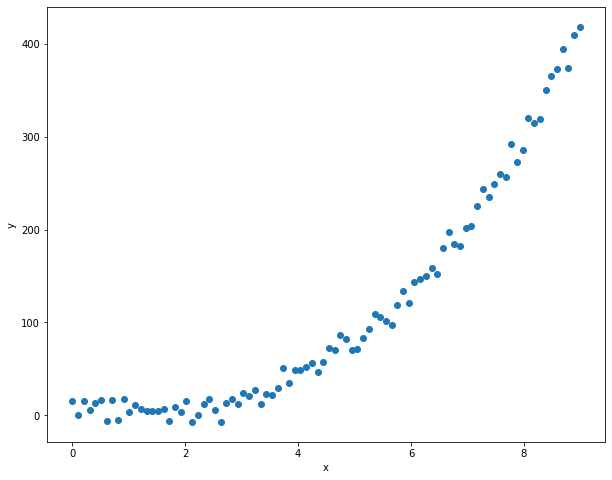

In [10]:
a = float(0.5)
b = float(0.6)
c = float(0.7)
d = float(0.9)
x = torch.linspace(0,10,dtype=torch.float32)
rand = torch.randn(100)*10
b = b*torch.ones_like(x)
y = a*x*x*x+b*x*x+c*x+d+rand
train_x = x[0:90]
test_x = x[90:100]
train_y = y[0:90]
test_y = y[90:100]
plt.figure(figsize=(10,8))
plt.plot(train_x.data.numpy(),train_y.data.numpy(),'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
class model(nn.Module):#继承nn.Module
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(1,5)
        self.hidden2 = nn.Linear(5,10)
        self.hidden3 = nn.Linear(10,5)
        self.out = nn.Linear(5,1)
    def forward(self,x):
        x = self.hidden1(x)
        x = F.relu(x)
        x = self.hidden2(x)
        x = F.relu(x)
        x = self.hidden3(x)
        x = F.relu(x)
        x = self.out(x)
        return x

In [12]:
net = model()
loss_fn = torch.nn.MSELoss()
opt = torch.optim.SGD(net.parameters(),lr=0.00001)

MSELoss
均方损失函数：
loss(xi,yi)=(xi−yi)2

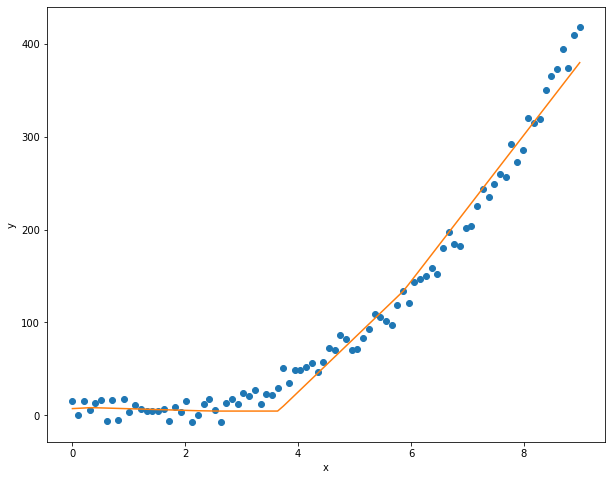

In [13]:
for i in range(10000):
    pred = net(train_x.view(-1,1))
    loss = loss_fn(pred,train_y.view(-1,1))

    opt.zero_grad()
    loss.backward()
    opt.step()

plt.figure(figsize=(10,8))
plt.plot(train_x.data.numpy(),train_y.data.numpy(),'o')
plt.plot(train_x.data.numpy(),net(train_x.view(-1,1)).data.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.show()

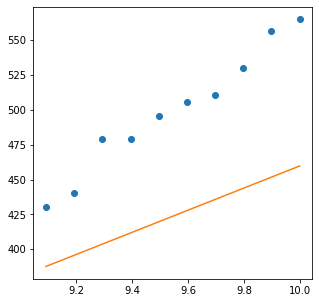

In [14]:
pred = net(test_x.view(-1,1))
plt.figure(figsize=(5,5))
plt.plot(test_x.data.numpy(),test_y.data.numpy(),'o')
plt.plot(test_x.data.numpy(),pred.data.numpy())
plt.show()

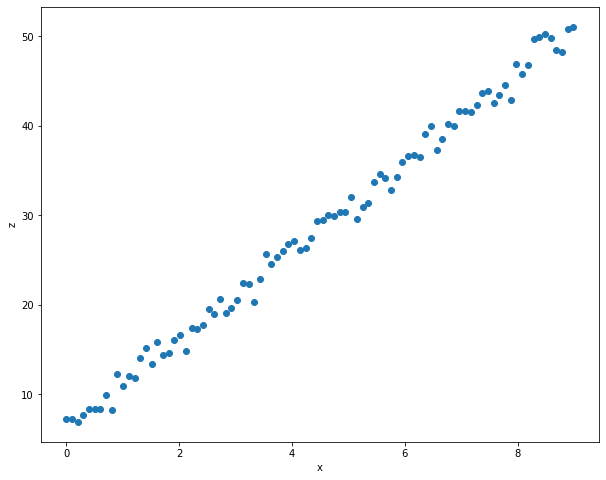

In [15]:
a = float(5)
b = float(6)
x = torch.linspace(0,10,dtype=torch.float32)
rand = torch.randn(100)*1
b = b*torch.ones_like(x)
z = a*x+b+rand
train_x = x[0:90]
test_x = x[90:100]
train_z = z[0:90]
test_z = z[90:100]

plt.figure(figsize=(10,8))
plt.plot(train_x.data.numpy(),train_z.data.numpy(),'o')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

In [16]:
net = model()
loss_fn = torch.nn.MSELoss()
opt = torch.optim.SGD(net.parameters(),lr=0.0001)

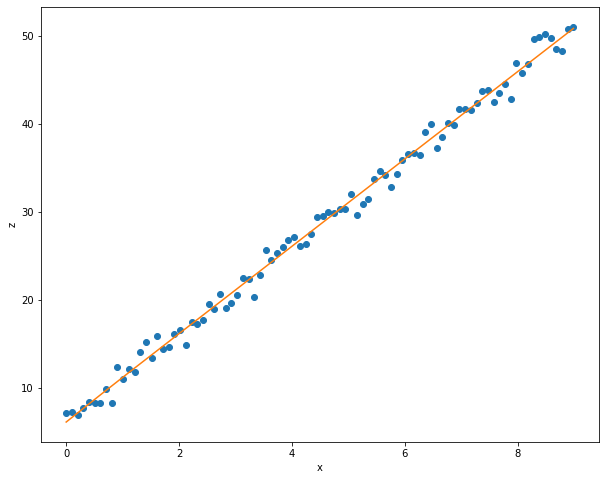

In [17]:

for i in range(10000):
    pred = net(train_x.view(-1,1))
    loss = loss_fn(pred,train_z.view(-1,1))
    opt.zero_grad()
    loss.backward()
    opt.step()

plt.figure(figsize=(10,8))
plt.plot(train_x.data.numpy(),train_z.data.numpy(),'o')
plt.plot(train_x.data.numpy(),net(train_x.view(-1,1)).data.numpy())
plt.xlabel('x')
plt.ylabel('z')
plt.show()

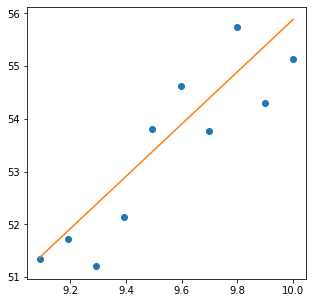

In [18]:
pred = net(test_x.view(-1,1))
plt.figure(figsize=(5,5))
plt.plot(test_x.data.numpy(),test_z.data.numpy(),'o')
plt.plot(test_x.data.numpy(),pred.data.numpy())
plt.show()